# Physt tutorial

This tutorial describes some of the basic features of physt.

In [1]:
# Necessary import evil
%matplotlib inline
from physt import histogram, binnings, h1, h2, h3
import numpy as np
import matplotlib.pyplot as plt

## Getting physt (to run)

I believe you can skip this section but anyway, for the sake of completeness, the default way of installing a relatively stable version of physt is via pip:

`pip install physt`

Alternatively, you can download the source code from github (https://github.com/janpipek/physt).

You will need **numpy** to use physt (required), but there are other packages (optional) that are very useful if you want to use physt at its best: **matplotlib** for plotting (or **bokeh** as a not-so-well supported alternative).

## Your first histogram

If you need to create a histogram, call the `histogram` (or `h1`) function with your data (like heights of people) as the first argument. The default gives a reasonable result...

In [2]:
# Basic dataset
heights = [160, 155, 156, 198, 177, 168, 191, 183, 184, 179, 178, 172, 173, 175,
           172, 177, 176, 175, 174, 173, 174, 175, 177, 169, 168, 164, 175, 188,
           178, 174, 173, 181, 185, 166, 162, 163, 171, 165, 180, 189, 166, 163,
           172, 173, 174, 183, 184, 161, 162, 168, 169, 174, 176, 170, 169, 165]

hist = histogram(heights)     # Automatically select all settings
hist

Histogram1D(bins=10, total=56.0)

...which is an object of the Histogram1D type that holds all the bin information...

In [3]:
hist.bins          # All the bins

array([[ 155. ,  159.3],
       [ 159.3,  163.6],
       [ 163.6,  167.9],
       [ 167.9,  172.2],
       [ 172.2,  176.5],
       [ 176.5,  180.8],
       [ 180.8,  185.1],
       [ 185.1,  189.4],
       [ 189.4,  193.7],
       [ 193.7,  198. ]])

In [4]:
hist.frequencies   # All the frequencies

array([  2.,   6.,   5.,  11.,  15.,   7.,   6.,   2.,   1.,   1.])

...and provides further features and methods, like plotting for example...

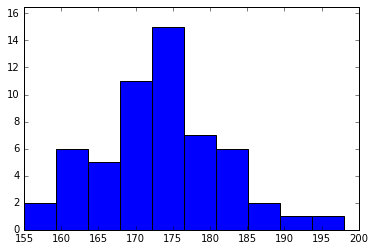

In [5]:
hist.plot();

...or adding new values (note that this is something numpy.histogram won't do for you)...

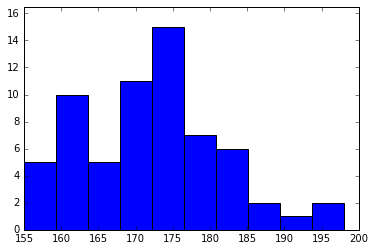

In [6]:
hist.fill(197)         # Here comes a lonely giant

# And a bunch of relatively short people
hist.fill_n([160, 160, 161, 157, 156, 159, 162])

hist.plot();           # See how the plot changes

## Data representation

The primary goal of physt library is to represent histograms as data objects with a set methods for easy manipulation and analysis (including mathematical operations, adaptivity, summary statistics. ...). The histogram classes used in [ROOT](https://root.cern.ch/) framework served as inspiration but not as a model to copy (though relevant methods often have same names).

Based on its dimensionality, a histogram is an instance of one of the following classes (all inheriting from **HistogramBase**):

* **Histogram1D** for univariate data
* **Histogram2D** for bivariate data
* **HistogramND** for data with higher dimensionality
* ...or some special dedicated class (user-provided). Currently, there is a **PolarHistogram** as an example (considered to be experimental, not API-stable).

However, these objects are \__init\__ialized with already calculated data and therefore, you typically don't construct the yourselves but call one of the facade functions:

* **histogram** or **h1**
* **histogram2d** or **h2**
* **histogramdd** (or **h3** for 3D case)

These functions try to find the best binning schema, calculate bin contents and set other properties for the histograms. In principle (if not, submit a bug report), if you call a function with arguments understood by eponymous numpy functions ([histogram](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogram.html), [histogram2d](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogram2d.html) and [histogramdd](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogramdd.html)), you should receive histogram with exactly the same bin edges and bin contents. However, there are many more arguments available!

In [7]:
# Back to people's parameters...
heights = np.random.normal(172, 10, 100)
weights = np.random.normal(70, 15, 100)
iqs = np.random.normal(100, 15, 100)

In [8]:
# 1D histogram
h1(heights)

Histogram1D(bins=10, total=100.0)

In [9]:
# 2D histogram
h2(heights, weights, [5, 7])

Histogram2D(bins=(5, 7), total=100.0)

In [12]:
# 3D histogram
h3([heights, weights, iqs])      # Simplification over numpy.histogramdd

HistogramND(bins=(10, 10, 10), total=100.0)

So, what do these objects contain?

### Binning schema

**TO BE CONTINUED**...

## Indexing

Supported indexing is more or less compatible with numpy arrays.

In [11]:
hist2.find_bin(173)           # Find a proper bin for some value (0 - based indices)

NameError: name 'hist2' is not defined

In [ ]:
hist2[5]                      # Return the bin (with frequency)

In [ ]:
hist2[-3:]                    # Sub-histogram (as slice)

In [ ]:
hist2[hist2.frequencies > 5]  # Masked array (destroys underflow & overflow information)

In [ ]:
hist2[[1, 3, 5]]              # Select some of the bins

## Statistics

When creating histograms, it is possible to keep simple statistics about the sampled distribution,
like mean() and std(). The behaviour was inspired by similar features in ROOT.

**To be yet refined.**

In [ ]:
hist2.mean()

In [ ]:
hist2.std()

## Plotting

This is currently based on matplotlib, but other tools might come later (d3.js, bokeh?)

In [ ]:
hist.plot();     # Basic plot

In [ ]:
hist.plot(density=True, errors=True, ecolor="red");   # Include errors

In [ ]:
hist2.plot(stats_box=True, errors=True, alpha=0.3);    # Show summary statistics

In [ ]:
hist.plot(cumulative=True, color="yellow", lw=3);           # Use matplotlib parameters

In [ ]:
hist.plot(histtype="scatter", s=hist.frequencies, density=True, errors=True);    # Another plot type

In [ ]:
# Plot different bins using different styles
axis = hist[hist.frequencies > 5].plot(label="High", alpha=0.5)
hist[1:-1][hist[1:-1].frequencies <= 5].plot(ax=axis, color="green", label="Low", alpha=0.5)
hist[[0, -1]].plot(ax=axis, color="red", label="Edge cases", alpha=0.5)
hist.plot(histtype="scatter", ax=axis, c=range(hist.bin_count), s=hist.frequencies * 30)
axis.legend();

In [ ]:
# Bar plot with colormap
hist.plot(cmap=True);

## Irregular binning and densities

In [ ]:
figure, axes = plt.subplots(1, 3, figsize=(11, 3))

hist_irregular = histogram(heights, [160, 162, 166, 167, 175, 188, 191])
hist_irregular.plot(ax=axes[0], errors=True, cmap="rainbow");
hist_irregular.plot(ax=axes[1], density=True, errors=True, cmap="rainbow");
hist_irregular.plot(ax=axes[2], density=True, cumulative=True, cmap="rainbow");

axes[0].set_title("Absolute values")
axes[1].set_title("Densities")
axes[2].set_title("Cumulative");

## Adding new values

### Add (fill) single values

In [ ]:
figure, axes = plt.subplots(1, 4, figsize=(12, 3))

hist3 = histogram([], bins=20, range=(160, 200))

for i, ax in enumerate(axes):
    for height in np.random.normal(165 + 10 * i, 2.8, 10000):
        hist3.fill(height)
    hist3.plot(ax=ax);
    print("After {0} batches: {1}".format(i, hist3))
figure.tight_layout()

### Add histograms with same binning

In [ ]:
heights1 = histogram(np.random.normal(169, 10, 100000), bins=50, range=(150, 200))
heights2 = histogram(np.random.normal(180, 11, 100000), bins=50, range=(150, 200))


total = heights1 + heights2

axis = heights1.plot(label="Women", color="red", alpha=0.5)
heights2.plot(label="Men", color="blue", alpha=0.5, ax=axis)
total.plot(label="All", color="gray", alpha=0.5, ax=axis)
axis.legend();

## Compatibility

Note: Mostly, the compatibility is a trivial consequence of the object being convertible to numpy array

In [ ]:
# Convert to pandas dataframe
hist.to_dataframe()

In [ ]:
# Works on xarray
import xarray as xr
arr = xr.DataArray(np.random.rand(10, 50, 100))
histogram(arr).plot(cmap="rainbow");

In [ ]:
# Works on pandas dataseries
import pandas as pd
series = pd.Series(heights)
histogram(series)

In [ ]:
# Works on blaze data fields
from blaze import Data
from blaze.utils import example
iris = Data(example('iris.csv'))
histogram(iris.sepal_length, bins=10).plot();

## Export & import

In [ ]:
json = hist.to_json()     # add path argument to write it to file
json

In [ ]:
from physt.histogram1d import Histogram1D
Histogram1D.from_json(json).plot();